# Complete Machine Learning & Data Science Bootcamp 2022

## Introduction and General Concepts
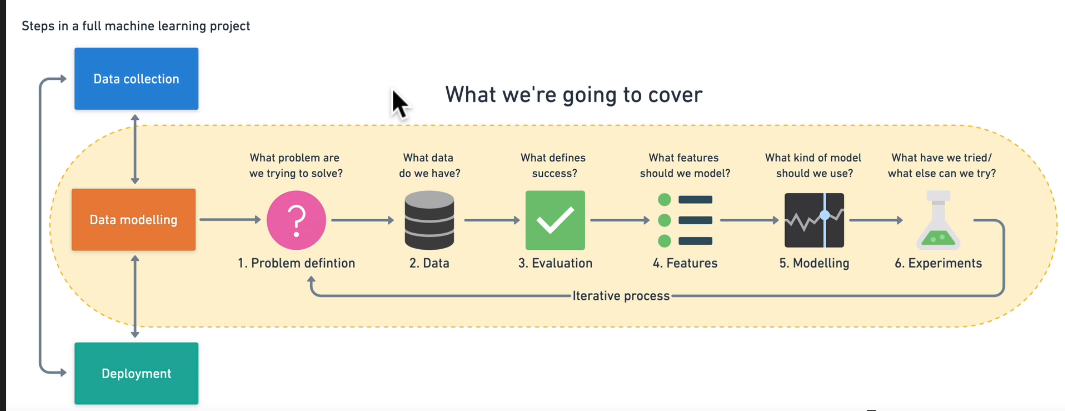

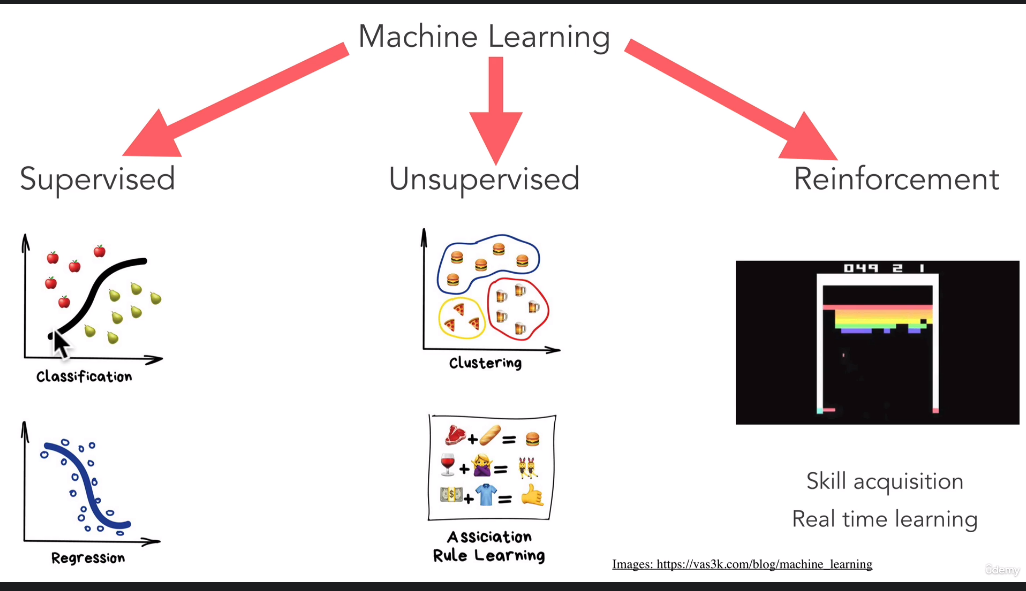

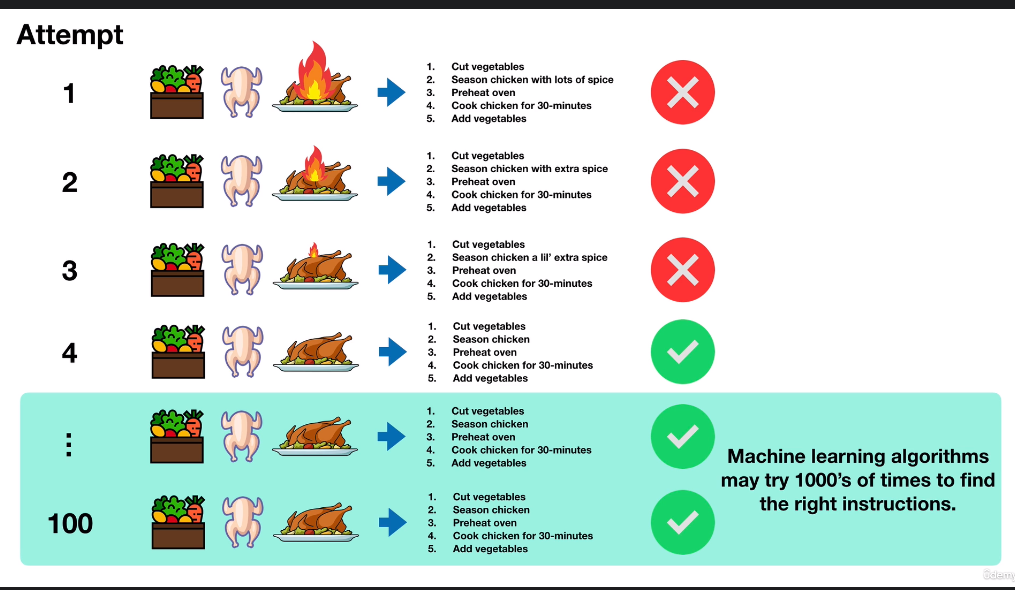

## Framework of ML

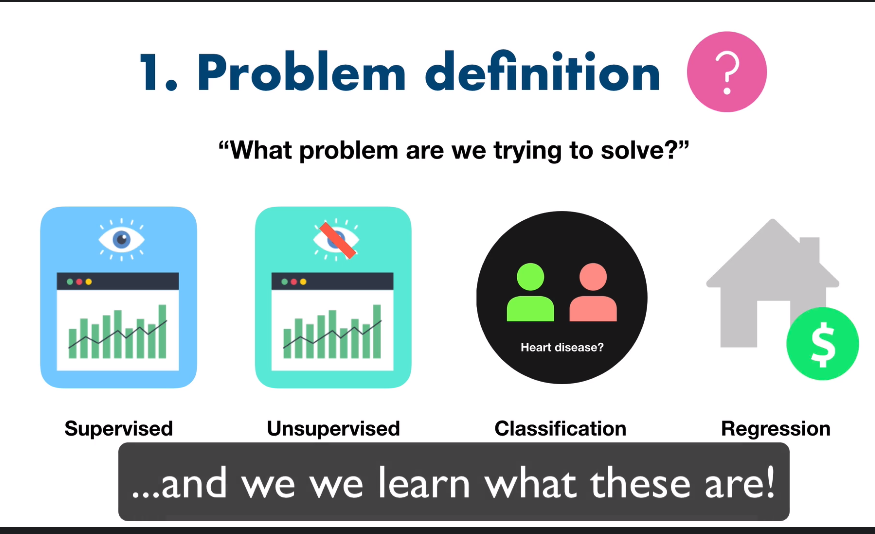

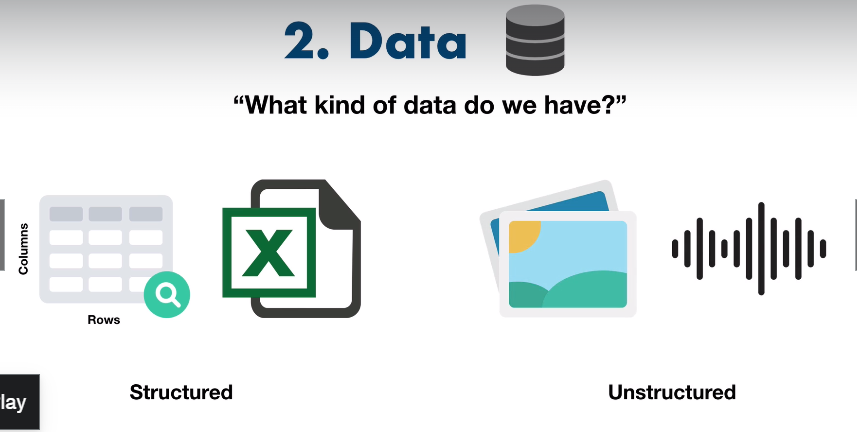

### Accuracy
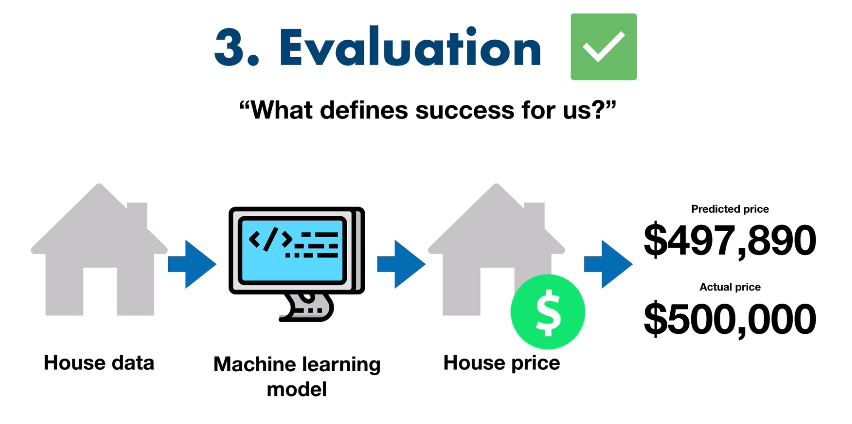

### Weight, Age, Height... -> Features! How to predict something with it
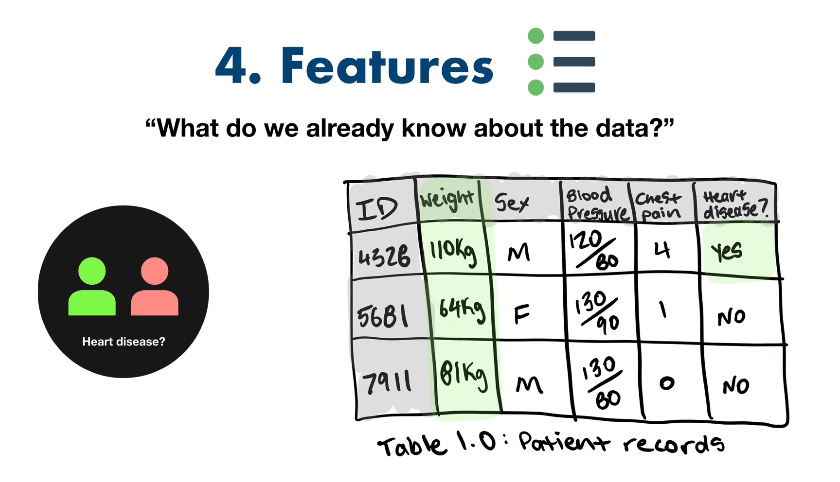

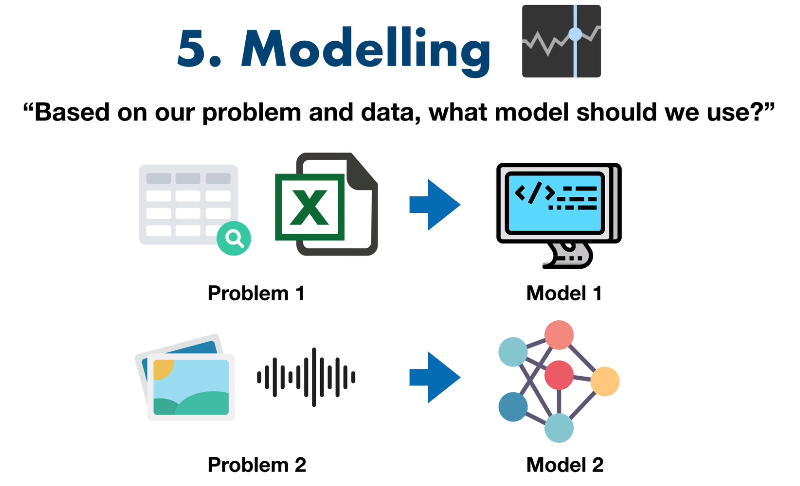

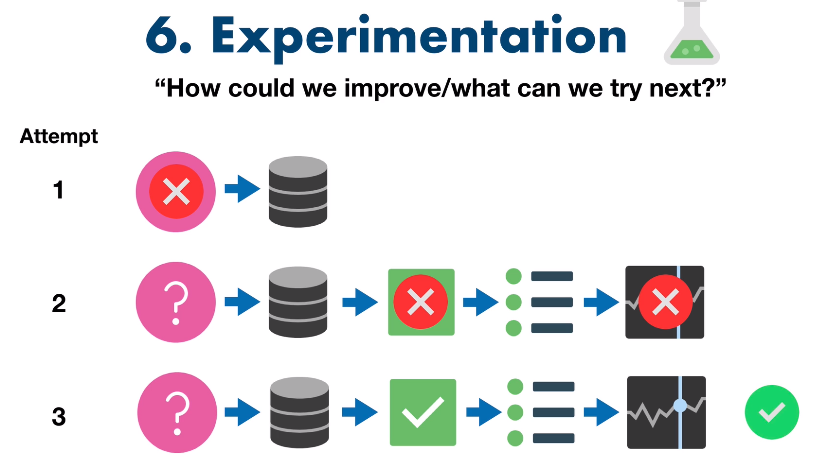

## Modeling

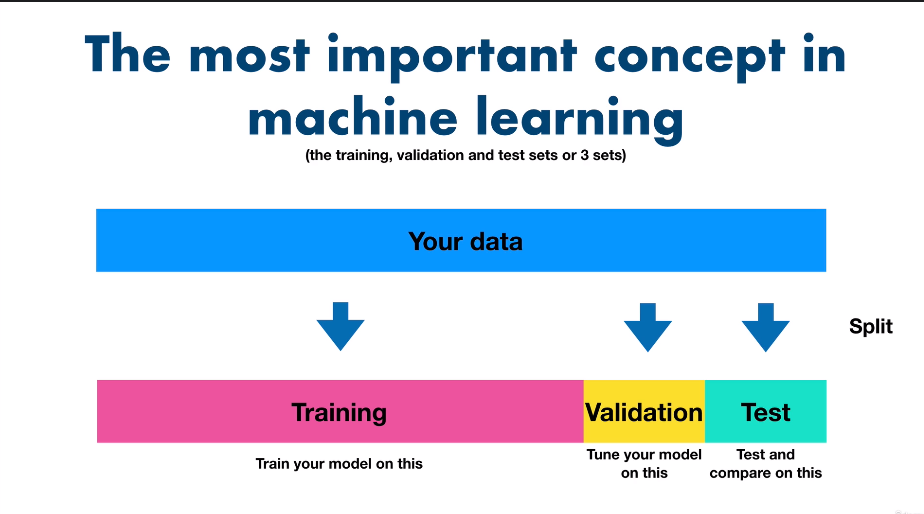

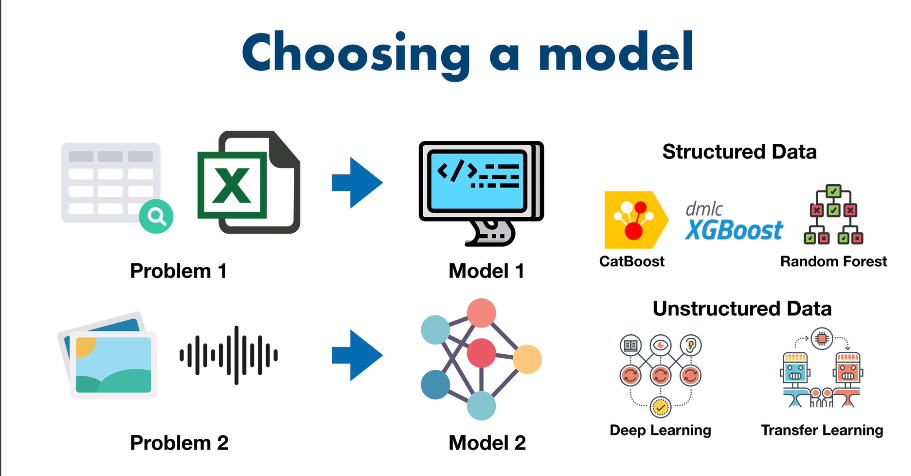

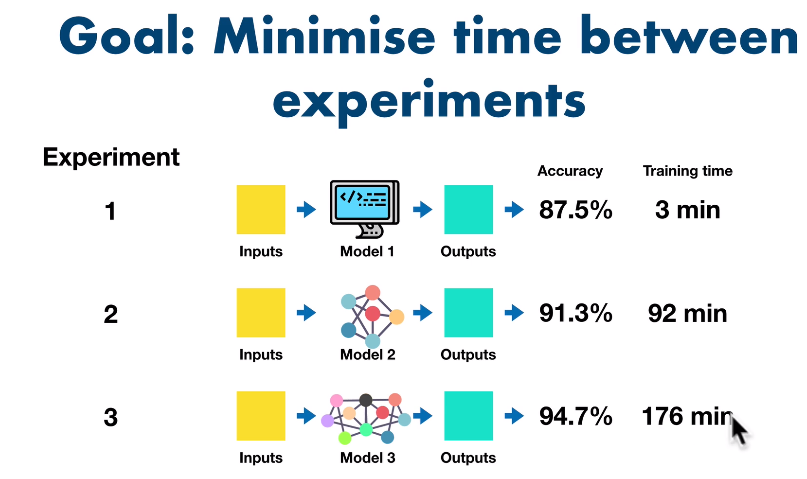

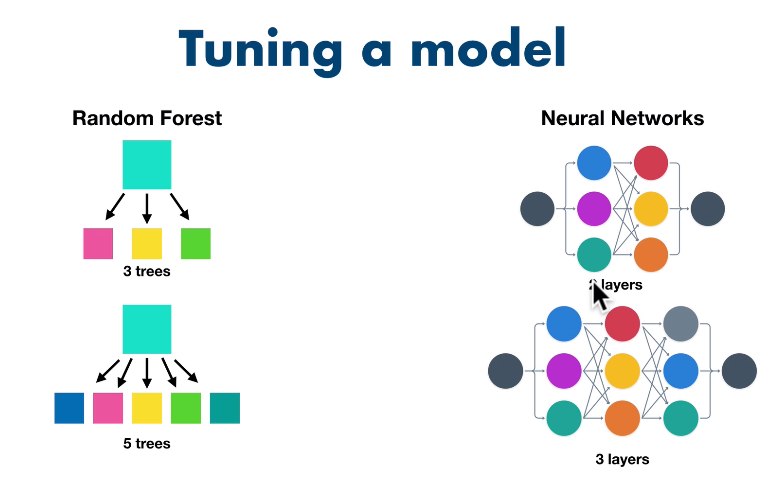

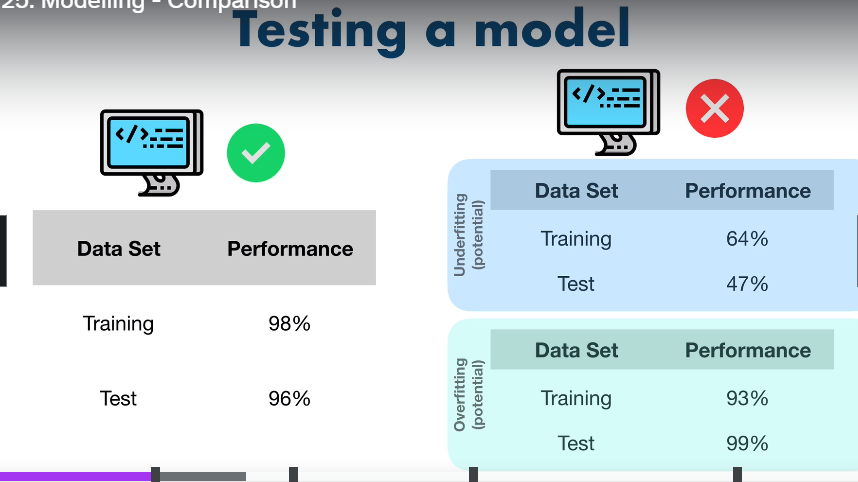

### Train and Test
- Ideally should be about the same performance (98% Train, 96% Test)
underfittting: Train set performance higher than Test set performance
overfitting: Train set performance lower than Test set performance

*causes: 
Data leakage - "seeing the exam before taking it"
Data mismatch: different data in train and test*

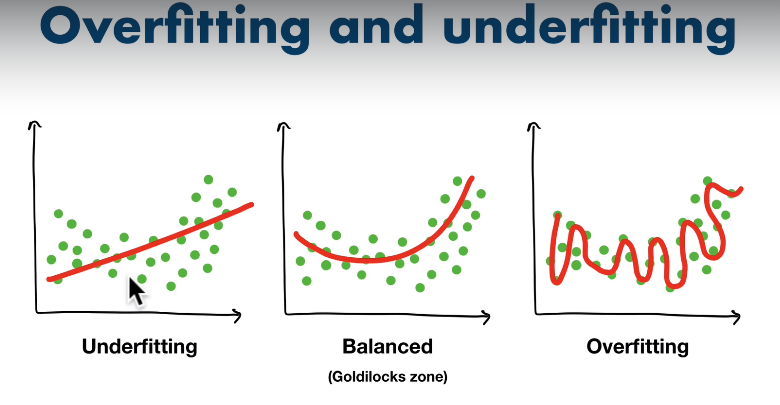

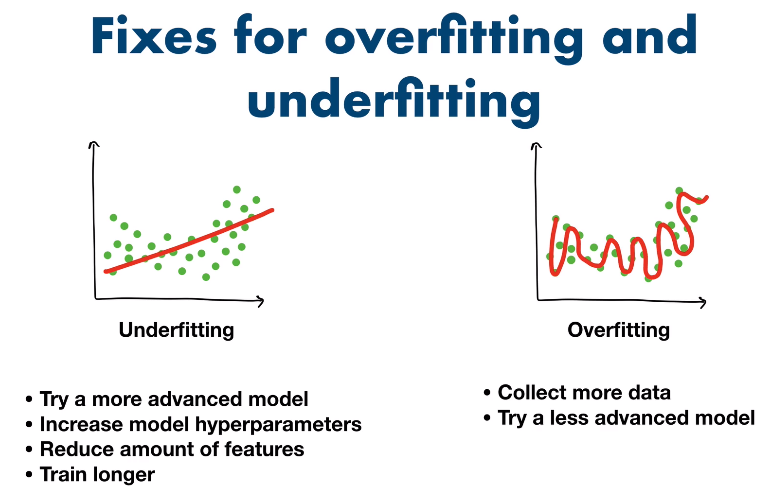

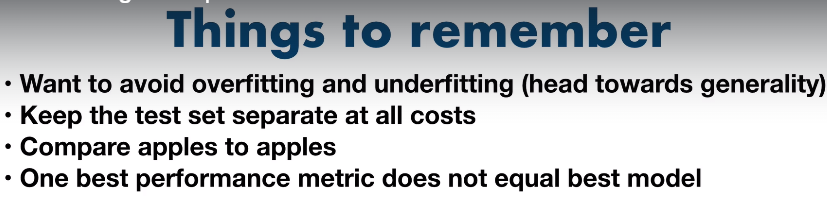

#### To summarize:

*Overfitting and Underfitting Definitions
Before we get into the experimentation side of things, it's worth having a little reminder of overfitting and underfitting are.*

*All experiments should be conducted on different portions of your data.

Training data set — Use this set for model training, 70–80% of your data is the standard.

Validation/development data set — Use this set for model hyperparameter tuning and experimentation evaluation, 10–15% of your data is the standard.

Test data set — Use this set for model testing and comparison, 10–15% of your data is the standard.

These amounts can fluctuate slightly, depending on your problem and the data you have.

Poor performance on training data means the model hasn’t learned properly and is underfitting. Try a different model, improve the existing one through hyperparameter or collect more data.

Great performance on the training data but poor performance on test data means your model doesn’t generalize well. Your model may be overfitting the training data. Try using a simpler model or making sure your the test data is of the same style your model is training on.

Another form of overfitting can come in the form of better performance on test data than training data. This may mean your testing data is leaking into your training data (incorrect data splits) or you've spent too much time optimizing your model for the test set data. Ensure your training and test datasets are kept separate at all times and avoid optimizing a models performance on the test set (use the training and validation sets for model improvement).

Poor performance once deployed (in the real world) means there’s a difference in what you trained and tested your model on and what is actually happening. Ensure the data you're using during experimentation matches up with the data you're using in production.*

### Extra links:

https://www.mrdbourke.com/a-6-step-field-guide-for-building-machine-learning-projects/

https://www.elementsofai.com/

https://zerotomastery.io/academy/

https://discord.com/channels/423464391791476747/423467167757893642

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

## Heart disease project

*This project is about classifying  whether or not a patiente has heart disease.*

In [6]:
df = pd.read_csv("heart-disease.csv")

The following table shows heart disease information

In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<AxesSubplot:>

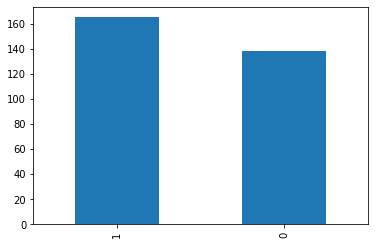

In [8]:
df.target.value_counts().plot(kind='bar')

![](6-step-ml-framework.png)

## 1. Problem Definition

Predict heart disease.

## 2. Data

This is the date for our problem.

In [9]:
ls

 Volume in drive C is Windows
 Volume Serial Number is A8E0-A899

 Directory of C:\Users\rebce\OneDrive\Python\Studying\Udemy

10/10/2022  10:56    <DIR>          .
10/10/2022  10:56    <DIR>          ..
04/10/2022  19:49    <DIR>          .ipynb_checkpoints
04/10/2022  19:35    <DIR>          __MACOSX
03/10/2022  13:39           332,025 6-step-ml-framework.png
24/10/2019  07:10           563,421 car-photo.png
03/10/2022  17:06               369 car-sales.csv
24/10/2019  07:13           495,206 dog-photo.png
04/10/2022  10:37               392 export_exercise
09/10/2022  18:11               371 exported-car-sales.csv
03/10/2022  13:38            11,328 heart-disease.csv
10/10/2022  10:56         3,830,472 ML_DS_Bootcamp_UDEMY.ipynb
04/10/2022  20:15            29,079 numpy-exercises.ipynb
04/10/2022  19:35         7,622,537 numpy-images.zip
24/10/2019  06:58         6,559,806 panda.png
04/10/2022  12:17            85,650 pandas-exercises.ipynb
05/10/2022  21:02             3,538 simple

# Starting with Pandas:

https://github.com/mrdbourke/zero-to-mastery-ml

In [10]:
import pandas as pd

## Series, Data Frames and CSVs

In [11]:
# 2 main datatypes
series = pd.Series(["BMW", "Toyota", "Honda"])

In [12]:
series

0       BMW
1    Toyota
2     Honda
dtype: object

In [13]:
# series = 1-dimensional

In [14]:
colours = pd.Series(["Red", "Blue", "White"])

In [15]:
colours

0      Red
1     Blue
2    White
dtype: object

In [16]:
# DataFrame = 2-dimensional
# more commmon
car_data = pd.DataFrame({"Car make": series, "Colour": colours})
car_data

,Car make,Colour
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [17]:
# Import data
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


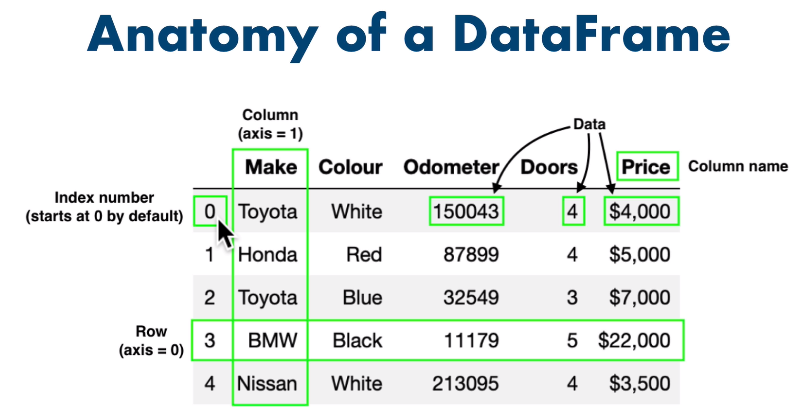

In [18]:
# Exporting DataFrame
car_sales.to_csv("exported-car-sales.csv", index=False)
# also possible to have .to_excel
# index= False - does not export the index as a column

In [19]:
exported_car_sales = pd.read_csv("exported-car-sales.csv")
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [20]:
# Importing using URLs directly (instead of downloading)

heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")

### Describing the Data

In [21]:
# Attribute - no parenthesis
car_sales.dtypes #price is an object not int

# Function - with parenthesis
# car_sales.to_csv()

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [22]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [23]:
car_columns = car_sales.columns
car_columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [24]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [25]:
car_sales 

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [26]:
car_sales.describe() #statistical info in our columns, but where is price?

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [27]:
car_sales.info() # getting some info on the data, info = index + dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [28]:
car_sales.mean()

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [29]:
car_prices = pd.Series([3000, 1500, 111250])
car_prices.mean()

38583.333333333336

In [30]:
car_sales.sum()

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [31]:
car_sales["Doors"].sum() #selecting one colummn

40

In [32]:
len(car_sales)

10

In [33]:
car_sales # it does have 10 as length

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Viewing and selecting data 

In [34]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [35]:
car_sales.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


In [36]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [37]:
# .loc and .iloc
animals = pd.Series(["cat", "dog", "bird", "panda", "snake"], 
                    index = [0, 3, 9, 8, 3])

In [38]:
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [39]:
animals.loc[3] # index numbers, even is same

3      dog
3    snake
dtype: object

In [40]:
animals.loc[9]

'bird'

In [41]:
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [42]:
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [43]:
# .iloc
animals.iloc[3] # position in ORDER, not index

'panda'

In [44]:
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [45]:
animals.iloc[:3]

0     cat
3     dog
9    bird
dtype: object

In [46]:
car_sales[car_sales["Make"] == "Toyota"] #Boolean Indexing

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [47]:
car_sales[car_sales["Odometer (KM)"] > 100000] #Boolean Indexing

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [48]:
pd.crosstab(car_sales["Make"], car_sales["Doors"]) 
#doors horizontal
#make on vertical

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [49]:
# Groupby - mean values of the group of all elements in Make
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [50]:
car_sales.groupby(["Colour"]).mean()

,Odometer (KM),Doors
Colour,,
Black,11179.000000,5.000000
Blue,44328.333333,3.666667
Green,99213.000000,4.000000
Red,87899.000000,4.000000
White,113684.500000,4.000000


<AxesSubplot:>

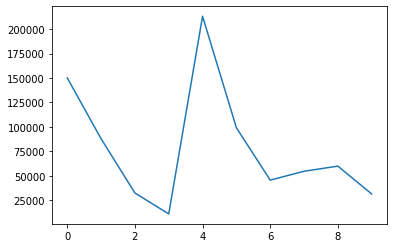

In [51]:
car_sales["Odometer (KM)"].plot()

<AxesSubplot:>

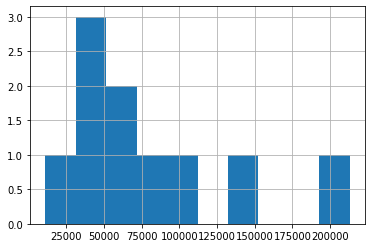

In [52]:
car_sales["Odometer (KM)"].hist()

In [53]:
# car_sales["Price"].plot() #price is not int is object

car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '').astype(int)

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
car_sales["Price"] = car_sales.Price/100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


## Manipulating Data

In [55]:
car_sales["Make"].str.lower()

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [56]:
car_sales["Make"] = car_sales["Make"].str.lower()
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,4000.0
1,honda,Red,87899,4,5000.0
2,toyota,Blue,32549,3,7000.0
3,bmw,Black,11179,5,22000.0
4,nissan,White,213095,4,3500.0
5,toyota,Green,99213,4,4500.0
6,honda,Blue,45698,4,7500.0
7,honda,Blue,54738,4,7000.0
8,toyota,White,60000,4,6250.0
9,nissan,White,31600,4,9700.0


In [57]:
car_sales_missing = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-missing-data.csv')

In [58]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [59]:
# car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean())


car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), 
                                                                    inplace=True)

In [60]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [61]:
car_sales_missing.dropna(inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [62]:
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-missing-data.csv")
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


## Creating data

In [63]:
# Column from series
seats_column = pd.Series([5, 5, 5, 5, 5])

# New column called seats
car_sales["Seats"] = seats_column
car_sales # series too short, gives nan

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000.0,5.0
1,honda,Red,87899,4,5000.0,5.0
2,toyota,Blue,32549,3,7000.0,5.0
3,bmw,Black,11179,5,22000.0,5.0
4,nissan,White,213095,4,3500.0,5.0
5,toyota,Green,99213,4,4500.0,NaN
6,honda,Blue,45698,4,7500.0,NaN
7,honda,Blue,54738,4,7000.0,NaN
8,toyota,White,60000,4,6250.0,NaN
9,nissan,White,31600,4,9700.0,NaN


In [64]:
car_sales["Seats"].fillna(5, inplace=True)
car_sales # we add the 5 value to all nan

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000.0,5.0
1,honda,Red,87899,4,5000.0,5.0
2,toyota,Blue,32549,3,7000.0,5.0
3,bmw,Black,11179,5,22000.0,5.0
4,nissan,White,213095,4,3500.0,5.0
5,toyota,Green,99213,4,4500.0,5.0
6,honda,Blue,45698,4,7500.0,5.0
7,honda,Blue,54738,4,7000.0,5.0
8,toyota,White,60000,4,6250.0,5.0
9,nissan,White,31600,4,9700.0,5.0


In [65]:
# Column from Python list
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 4.5]
car_sales["Fuel par 100KM"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM
0,toyota,White,150043,4,4000.0,5.0,7.5
1,honda,Red,87899,4,5000.0,5.0,9.2
2,toyota,Blue,32549,3,7000.0,5.0,5.0
3,bmw,Black,11179,5,22000.0,5.0,9.6
4,nissan,White,213095,4,3500.0,5.0,8.7
5,toyota,Green,99213,4,4500.0,5.0,4.7
6,honda,Blue,45698,4,7500.0,5.0,7.6
7,honda,Blue,54738,4,7000.0,5.0,8.7
8,toyota,White,60000,4,6250.0,5.0,3.0
9,nissan,White,31600,4,9700.0,5.0,4.5


In [66]:
car_sales["Total fuel used"] = car_sales["Odometer (KM)"]/100*car_sales["Fuel par 100KM"]

In [67]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Total fuel used
0,toyota,White,150043,4,4000.0,5.0,7.5,11253.225
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450
3,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265
5,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011
6,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048
7,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206
8,toyota,White,60000,4,6250.0,5.0,3.0,1800.000
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000


In [68]:
# Create a column from a single value
car_sales["Number of Wheels"] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Total fuel used,Number of Wheels
0,toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4
3,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184,4
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4
5,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4
6,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4
7,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4
8,toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4


In [69]:
car_sales["Passed road safety"] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Total fuel used,Number of Wheels,Passed road safety
0,toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
3,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
5,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
6,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
7,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
8,toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True


In [70]:
car_sales.drop("Total fuel used", axis=1, inplace= True)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety
0,toyota,White,150043,4,4000.0,5.0,7.5,4,True
1,honda,Red,87899,4,5000.0,5.0,9.2,4,True
2,toyota,Blue,32549,3,7000.0,5.0,5.0,4,True
3,bmw,Black,11179,5,22000.0,5.0,9.6,4,True
4,nissan,White,213095,4,3500.0,5.0,8.7,4,True
5,toyota,Green,99213,4,4500.0,5.0,4.7,4,True
6,honda,Blue,45698,4,7500.0,5.0,7.6,4,True
7,honda,Blue,54738,4,7000.0,5.0,8.7,4,True
8,toyota,White,60000,4,6250.0,5.0,3.0,4,True
9,nissan,White,31600,4,9700.0,5.0,4.5,4,True


In [71]:
import numpy as np

In [72]:
car_sales["Fabrication date"] = np.linspace(1950, 2020, len(car_sales), dtype=int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety,Fabrication date
0,toyota,White,150043,4,4000.0,5.0,7.5,4,True,1950
1,honda,Red,87899,4,5000.0,5.0,9.2,4,True,1957
2,toyota,Blue,32549,3,7000.0,5.0,5.0,4,True,1965
3,bmw,Black,11179,5,22000.0,5.0,9.6,4,True,1973
4,nissan,White,213095,4,3500.0,5.0,8.7,4,True,1981
5,toyota,Green,99213,4,4500.0,5.0,4.7,4,True,1988
6,honda,Blue,45698,4,7500.0,5.0,7.6,4,True,1996
7,honda,Blue,54738,4,7000.0,5.0,8.7,4,True,2004
8,toyota,White,60000,4,6250.0,5.0,3.0,4,True,2012
9,nissan,White,31600,4,9700.0,5.0,4.5,4,True,2020


In [73]:
#mixing data, making it random, the index is still the original
car_sales_shuffle = car_sales.sample(frac=1)
car_sales_shuffle

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety,Fabrication date
8,toyota,White,60000,4,6250.0,5.0,3.0,4,True,2012
0,toyota,White,150043,4,4000.0,5.0,7.5,4,True,1950
6,honda,Blue,45698,4,7500.0,5.0,7.6,4,True,1996
9,nissan,White,31600,4,9700.0,5.0,4.5,4,True,2020
4,nissan,White,213095,4,3500.0,5.0,8.7,4,True,1981
3,bmw,Black,11179,5,22000.0,5.0,9.6,4,True,1973
5,toyota,Green,99213,4,4500.0,5.0,4.7,4,True,1988
7,honda,Blue,54738,4,7000.0,5.0,8.7,4,True,2004
1,honda,Red,87899,4,5000.0,5.0,9.2,4,True,1957
2,toyota,Blue,32549,3,7000.0,5.0,5.0,4,True,1965


In [74]:
#only selecting a percentage of the data to work with
#it goes quicker than using all data is df too big
car_sales_shuffle.sample(frac=0.4)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety,Fabrication date
7,honda,Blue,54738,4,7000.0,5.0,8.7,4,True,2004
2,toyota,Blue,32549,3,7000.0,5.0,5.0,4,True,1965
8,toyota,White,60000,4,6250.0,5.0,3.0,4,True,2012
4,nissan,White,213095,4,3500.0,5.0,8.7,4,True,1981


In [75]:
car_sales_shuffle.reset_index() #reset the indx to order"
# adds the oold index as a new column

,index,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety,Fabrication date
0,8,toyota,White,60000,4,6250.0,5.0,3.0,4,True,2012
1,0,toyota,White,150043,4,4000.0,5.0,7.5,4,True,1950
2,6,honda,Blue,45698,4,7500.0,5.0,7.6,4,True,1996
3,9,nissan,White,31600,4,9700.0,5.0,4.5,4,True,2020
4,4,nissan,White,213095,4,3500.0,5.0,8.7,4,True,1981
5,3,bmw,Black,11179,5,22000.0,5.0,9.6,4,True,1973
6,5,toyota,Green,99213,4,4500.0,5.0,4.7,4,True,1988
7,7,honda,Blue,54738,4,7000.0,5.0,8.7,4,True,2004
8,1,honda,Red,87899,4,5000.0,5.0,9.2,4,True,1957
9,2,toyota,Blue,32549,3,7000.0,5.0,5.0,4,True,1965


In [76]:
car_sales_shuffle.reset_index(drop=True) 
# does not take the old index as column

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety,Fabrication date
0,toyota,White,60000,4,6250.0,5.0,3.0,4,True,2012
1,toyota,White,150043,4,4000.0,5.0,7.5,4,True,1950
2,honda,Blue,45698,4,7500.0,5.0,7.6,4,True,1996
3,nissan,White,31600,4,9700.0,5.0,4.5,4,True,2020
4,nissan,White,213095,4,3500.0,5.0,8.7,4,True,1981
5,bmw,Black,11179,5,22000.0,5.0,9.6,4,True,1973
6,toyota,Green,99213,4,4500.0,5.0,4.7,4,True,1988
7,honda,Blue,54738,4,7000.0,5.0,8.7,4,True,2004
8,honda,Red,87899,4,5000.0,5.0,9.2,4,True,1957
9,toyota,Blue,32549,3,7000.0,5.0,5.0,4,True,1965


In [77]:
# x is the values in odometer, lambda is a function 
# apply - assigne a function to a column
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x/1.6)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety,Fabrication date
0,toyota,White,93776.875,4,4000.0,5.0,7.5,4,True,1950
1,honda,Red,54936.875,4,5000.0,5.0,9.2,4,True,1957
2,toyota,Blue,20343.125,3,7000.0,5.0,5.0,4,True,1965
3,bmw,Black,6986.875,5,22000.0,5.0,9.6,4,True,1973
4,nissan,White,133184.375,4,3500.0,5.0,8.7,4,True,1981
5,toyota,Green,62008.125,4,4500.0,5.0,4.7,4,True,1988
6,honda,Blue,28561.250,4,7500.0,5.0,7.6,4,True,1996
7,honda,Blue,34211.250,4,7000.0,5.0,8.7,4,True,2004
8,toyota,White,37500.000,4,6250.0,5.0,3.0,4,True,2012
9,nissan,White,19750.000,4,9700.0,5.0,4.5,4,True,2020


In [78]:
# try it, run the code
# search for it
# try again
# ask

# Numpy

In [79]:
import numpy as np

## DataTypes & Attributes

In [80]:
#Numpy's main datatype is ndarray
a1 = np.array([1, 2, 3])
a1

array([1, 2, 3])

In [81]:
type(a1)

numpy.ndarray

In [82]:
a2 = np.array([[1, 2.0, 3.3],
              [4, 5, 6.5]])

# Same array as slide in video
a3 = np.array([[[1, 2, 3],
                [4, 5, 6]],
               [[7, 8, 9],
                [10, 11, 12]],
               [[13, 14, 15],
                [16, 17, 18]]])

In [83]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [84]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

In [85]:
a1.shape

(3,)

In [86]:
a2.shape

(2, 3)

In [87]:
a3.shape

(3, 2, 3)

In [88]:
a1.ndim, a2.ndim, a3.ndim #number of dimentions

(1, 2, 3)

In [89]:
a1.dtype, a2.dtype, a3.dtype

(dtype('int32'), dtype('float64'), dtype('int32'))

In [90]:
a1.size, a2.size, a3.size

(3, 6, 18)

In [91]:
type(a1), type(a2), type(a3)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [92]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [93]:
df = pd.DataFrame(a2) # pandas and numpy are correlated
df

,0,1,2
0,1.0,2.0,3.3
1,4.0,5.0,6.5


## Creating Numpy arrays

In [94]:
sample_array = np.array([1,2,3])
sample_array.dtype

dtype('int32')

In [95]:
ones = np.ones((2,3))
ones.dtype
type(ones)

numpy.ndarray

In [96]:
zeros = np.zeros((2,3))

In [97]:
zeros

array([[0., 0., 0.],
       [0., 0., 0.]])

In [98]:
range_array = np.arange(0, 10, 2)

In [99]:
range_array

array([0, 2, 4, 6, 8])

In [100]:
np.linspace(0,10,2)

array([ 0., 10.])

In [101]:
random_array = np.random.randint(0, 10, size=(5,3))
random_array

array([[9, 5, 4],
       [0, 3, 2],
       [0, 4, 1],
       [3, 2, 5],
       [3, 6, 6]])

In [102]:
random_array.size

15

In [103]:
random_array.shape

(5, 3)

In [104]:
random_array2 = np.random.random((5, 3))
random_array2

array([[0.32985863, 0.16762273, 0.37731595],
       [0.62214714, 0.65686217, 0.60367632],
       [0.15260161, 0.79147256, 0.14636746],
       [0.14288434, 0.02594041, 0.89836804],
       [0.50013188, 0.87197265, 0.38053257]])

In [105]:
random_array3 = np.random.rand(5,3)
random_array3

array([[0.01928831, 0.33636136, 0.79494538],
       [0.92810028, 0.78621434, 0.91213947],
       [0.84572965, 0.42288349, 0.60847176],
       [0.61516427, 0.81944312, 0.08892521],
       [0.30391419, 0.42292665, 0.52271649]])

In [106]:
#pseudo-random numbers
np.random.seed(seed=9999)
random_array4 = np.random.randint(10, size=(5,3))
random_array4

array([[6, 1, 6],
       [5, 5, 9],
       [6, 8, 0],
       [8, 1, 5],
       [3, 1, 0]])

In [107]:
np.random.seed(7)
random_array5 = np.random.random((5, 3))
random_array5

array([[0.07630829, 0.77991879, 0.43840923],
       [0.72346518, 0.97798951, 0.53849587],
       [0.50112046, 0.07205113, 0.26843898],
       [0.4998825 , 0.67923   , 0.80373904],
       [0.38094113, 0.06593635, 0.2881456 ]])

In [108]:
np.random.seed(7)
random_array5 = np.random.random((5,3))
random_array5

array([[0.07630829, 0.77991879, 0.43840923],
       [0.72346518, 0.97798951, 0.53849587],
       [0.50112046, 0.07205113, 0.26843898],
       [0.4998825 , 0.67923   , 0.80373904],
       [0.38094113, 0.06593635, 0.2881456 ]])

## Numpy Visualization and Matrices:

In [109]:
random_array4

array([[6, 1, 6],
       [5, 5, 9],
       [6, 8, 0],
       [8, 1, 5],
       [3, 1, 0]])

In [110]:
np.unique(random_array4)

array([0, 1, 3, 5, 6, 8, 9])

In [111]:
a1

array([1, 2, 3])

In [112]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [113]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])

In [114]:
a2.shape

(2, 3)

In [115]:
a3.shape

(3, 2, 3)

In [116]:
a3[:,0]

array([[ 1,  2,  3],
       [ 7,  8,  9],
       [13, 14, 15]])

In [117]:
a2[1]

array([4. , 5. , 6.5])

In [118]:
a3[:2, :2, :2]

array([[[ 1,  2],
        [ 4,  5]],

       [[ 7,  8],
        [10, 11]]])

In [119]:
# 5 is the number of elements in one line
# 4 is the number of lines in one block
# 3 is the number of blocks
# 2 is the number of that conglomerates the 6 blocks

a4 = np.random.randint(10, size=(2, 3, 4, 5))
a4

array([[[[3, 5, 8, 8, 7],
         [5, 0, 0, 2, 8],
         [9, 6, 4, 9, 7],
         [3, 3, 8, 3, 0]],

        [[1, 0, 0, 6, 7],
         [7, 9, 3, 0, 7],
         [7, 7, 0, 5, 4],
         [3, 1, 3, 1, 3]],

        [[4, 3, 1, 9, 5],
         [9, 1, 2, 3, 2],
         [2, 5, 7, 3, 0],
         [9, 9, 3, 4, 5]]],


       [[[3, 0, 4, 8, 6],
         [7, 2, 7, 3, 8],
         [6, 6, 5, 6, 5],
         [7, 1, 5, 4, 4]],

        [[9, 9, 0, 6, 2],
         [6, 8, 2, 4, 1],
         [6, 1, 5, 1, 6],
         [9, 8, 6, 5, 9]],

        [[7, 5, 4, 9, 6],
         [8, 1, 5, 5, 8],
         [3, 7, 7, 9, 4],
         [7, 5, 9, 6, 2]]]])

In [120]:
a4.shape

(2, 3, 4, 5)

In [121]:
a4.ndim

4

In [122]:
#how to get the first 4 numbers of the inner most array
a4[1, 0,  0, :4]

array([3, 0, 4, 8])

In [123]:
# only a few columns in all dimentions
a4[:, :,  :, :2]

array([[[[3, 5],
         [5, 0],
         [9, 6],
         [3, 3]],

        [[1, 0],
         [7, 9],
         [7, 7],
         [3, 1]],

        [[4, 3],
         [9, 1],
         [2, 5],
         [9, 9]]],


       [[[3, 0],
         [7, 2],
         [6, 6],
         [7, 1]],

        [[9, 9],
         [6, 8],
         [6, 1],
         [9, 8]],

        [[7, 5],
         [8, 1],
         [3, 7],
         [7, 5]]]])

## Manipulating and Comparing arrays

### Arithmetic

In [124]:
a1

array([1, 2, 3])

In [125]:
ones = np.ones(3)
ones

array([1., 1., 1.])

In [126]:
a1 + ones 

array([2., 3., 4.])

In [127]:
a1 - ones

array([0., 1., 2.])

In [128]:
a1*ones

array([1., 2., 3.])

In [129]:
a1

array([1, 2, 3])

In [130]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [131]:
a1*a2 # ech line multiplies another line

array([[ 1. ,  4. ,  9.9],
       [ 4. , 10. , 19.5]])

### Broadcasting: arithmatic with arrays of different sizes

In [132]:
a2*a3 # the small array is broadcast (operation) throughtout the bigger array

array([[[  1. ,   4. ,   9.9],
        [ 16. ,  25. ,  39. ]],

       [[  7. ,  16. ,  29.7],
        [ 40. ,  55. ,  78. ]],

       [[ 13. ,  28. ,  49.5],
        [ 64. ,  85. , 117. ]]])

In [133]:
a2.shape

(2, 3)

In [134]:
a3.shape

(3, 2, 3)

In [135]:
a4 = np.array([[[  1. ,   4. ,   9.9],
        [ 16. ,  25. ,  39. ],
        [  7. ,  16. ,  29.7]],

        [[ 40. ,  55. ,  78. ],
        [ 13. ,  28. ,  49.5],
        [ 64. ,  85. , 117. ]]])

In [136]:
a2*a4

ValueError: operands could not be broadcast together with shapes (2,3) (2,3,3) 

In [137]:
a2*a4.reshape(3,2,3)

array([[[  1.  ,   8.  ,  32.67],
        [ 64.  , 125.  , 253.5 ]],

       [[  7.  ,  32.  ,  98.01],
        [160.  , 275.  , 507.  ]],

       [[ 13.  ,  56.  , 163.35],
        [256.  , 425.  , 760.5 ]]])

In [138]:
a1/ones

array([1., 2., 3.])

In [139]:
a2/a1

array([[1.        , 1.        , 1.1       ],
       [4.        , 2.5       , 2.16666667]])

In [140]:
a2//a1 #rounded down

array([[1., 1., 1.],
       [4., 2., 2.]])

In [141]:
a2 ** 2

array([[ 1.  ,  4.  , 10.89],
       [16.  , 25.  , 42.25]])

In [142]:
np.square(a2) #same as **2

array([[ 1.  ,  4.  , 10.89],
       [16.  , 25.  , 42.25]])

In [143]:
np.add(a1, ones)

array([2., 3., 4.])

In [144]:
a1%2 #modulo: the rest after the division

array([1, 0, 1], dtype=int32)

In [145]:
a1/2

array([0.5, 1. , 1.5])

In [146]:
np.exp(a1)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [147]:
np.log(a1)

array([0.        , 0.69314718, 1.09861229])

## Agregation

Aggregation = performing the same operation on a number of things

In [148]:
listy = [1, 2, 3]
type(listy)

list

In [149]:
sum(listy)

6

In [150]:
type(a1)

numpy.ndarray

In [151]:
np.sum(a1)

6

 numpy arrays - use ` np.sum()` 
 python datatypes - use python methods ` sum()` 

In [152]:
# why two functions??? python sum or np.sum??
# numpy arrays - use np.sum()
# python datatypes - use python methods

massive_array = np.random.random(100000)
massive_array.size

100000

In [153]:
%timeit sum(massive_array) #python method
%timeit np.sum(massive_array) # numpy's np.sum()

18.8 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
55.3 µs ± 5.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [154]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [155]:
np.mean(a2)

3.6333333333333333

In [156]:
np.max(a2)

6.5

In [157]:
# Standard deviation = a mesure of how spread out a group of number is 
# from the mean (sqrt of the var)

np.std(a2)

1.8226964152656422

In [158]:
# variance = mesure of the average degree to which number is 
# different to the mean
# high var = wider range of number
# low var = lower range of numbers
np.var(a2)

3.3222222222222224

In [159]:
np.sqrt(np.var(a2))

1.8226964152656422

In [160]:
# Demo of std and var
high_var_array = np.array([1, 100, 200, 300, 4000, 5000])
low_var_array = np.array([2, 4, 6, 8, 10])

In [161]:
np.var(high_var_array), np.var(low_var_array)

# high var = wider range of number - numbers separated
# low var = lower range of numbers - numbers close together

(4296133.472222221, 8.0)

In [162]:
np.std(high_var_array), np.std(low_var_array)

(2072.711623024829, 2.8284271247461903)

In [163]:
np.mean(high_var_array), np.mean(low_var_array)

(1600.1666666666667, 6.0)

In [164]:
import matplotlib.pyplot as plt

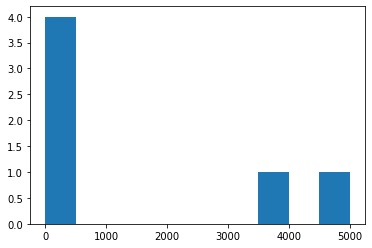

(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

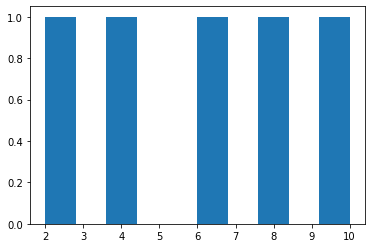

In [165]:
plt.hist(high_var_array)
plt.show()
plt.hist(low_var_array)

### Reshaping and Transposing

In [166]:
a2

array([[1. , 2. , 3.3],
       [4. , 5. , 6.5]])

In [167]:
a4

array([[[  1. ,   4. ,   9.9],
        [ 16. ,  25. ,  39. ],
        [  7. ,  16. ,  29.7]],

       [[ 40. ,  55. ,  78. ],
        [ 13. ,  28. ,  49.5],
        [ 64. ,  85. , 117. ]]])

In [168]:
a2.reshape(2,3,1).shape

(2, 3, 1)

In [169]:
a2.reshape(2,3,1)*a4

array([[[  1.  ,   4.  ,   9.9 ],
        [ 32.  ,  50.  ,  78.  ],
        [ 23.1 ,  52.8 ,  98.01]],

       [[160.  , 220.  , 312.  ],
        [ 65.  , 140.  , 247.5 ],
        [416.  , 552.5 , 760.5 ]]])

In [170]:
#transpose = switches the axis
a2.T

array([[1. , 4. ],
       [2. , 5. ],
       [3.3, 6.5]])

In [171]:
a4.T

array([[[  1. ,  40. ],
        [ 16. ,  13. ],
        [  7. ,  64. ]],

       [[  4. ,  55. ],
        [ 25. ,  28. ],
        [ 16. ,  85. ]],

       [[  9.9,  78. ],
        [ 39. ,  49.5],
        [ 29.7, 117. ]]])

### Dot product 

In [172]:
np.random.seed(0)

mat1 = np.random.randint(10, size = (5,3))
mat2 = np.random.randint(10, size=(5,3))

print(mat1, '\n')
print(mat2)

[[5 0 3]
 [3 7 9]
 [3 5 2]
 [4 7 6]
 [8 8 1]] 

[[6 7 7]
 [8 1 5]
 [9 8 9]
 [4 3 0]
 [3 5 0]]


In [173]:
# element wise multiplication
mat1*mat2

np.multiply(mat1, mat2)

array([[30,  0, 21],
       [24,  7, 45],
       [27, 40, 18],
       [16, 21,  0],
       [24, 40,  0]])

In [174]:
# Dot product
np.dot(mat1, mat2)

ValueError: shapes (5,3) and (5,3) not aligned: 3 (dim 1) != 5 (dim 0)

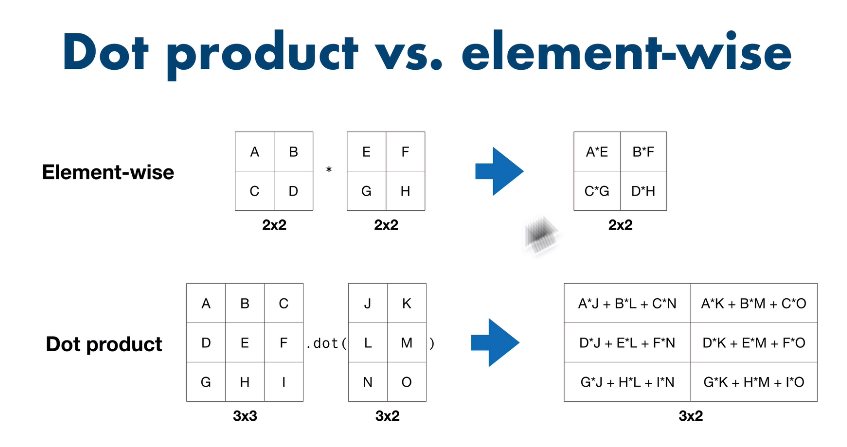

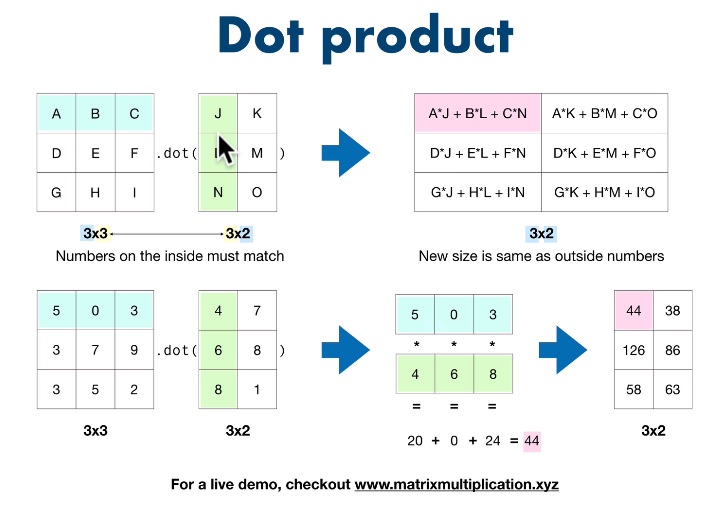

In [175]:
mat1.T.shape, mat2.shape

((3, 5), (5, 3))

In [176]:
np.dot(mat1.T, mat2).shape

(3, 3)

### Dot product example

In [177]:
np.random.seed(0)
# number of jars sold
sales_amounts = np.random.randint(20, size=(5,3))
sales_amounts

array([[12, 15,  0],
       [ 3,  3,  7],
       [ 9, 19, 18],
       [ 4,  6, 12],
       [ 1,  6,  7]])

In [178]:
# Create weekly_sales DataFrame
weekly_sales = pd.DataFrame(sales_amounts, 
                           index=["Mon", "Tue", "Wed", "Thu", "Fri"],
                           columns=["Almond Butter", "Peanut Butter", 
                                    "Cashew Butter"])
weekly_sales

,Almond Butter,Peanut Butter,Cashew Butter
Mon,12,15,0
Tue,3,3,7
Wed,9,19,18
Thu,4,6,12
Fri,1,6,7


In [179]:
# Create prices array
prices = np.array([10, 8, 12])

In [180]:
prices.shape

(3,)

In [181]:
# create butter prices dataframe
butter_prices = pd.DataFrame(prices.reshape(1,3), index=["Price"],
                            columns=["Almond Butter", "Peanut Butter", 
                                    "Cashew Butter"])
butter_prices

,Almond Butter,Peanut Butter,Cashew Butter
Price,10,8,12


In [182]:
total_sales = prices.dot(sales_amounts)

ValueError: shapes (3,) and (5,3) not aligned: 3 (dim 0) != 5 (dim 0)

In [ ]:
# Shapes arent aligned, lets transpose
total_sales = prices.dot(sales_amounts.T)
total_sales

In [ ]:
# create daily sales
butter_prices, butter_prices.shape

In [ ]:
weekly_sales, weekly_sales.shape

In [ ]:
daily_sales = butter_prices.dot(weekly_sales.T)
daily_sales

In [ ]:
weekly_sales["Total ($)"] = daily_sales.T
weekly_sales

### Comparison Operators

In [ ]:
a1, a2

In [ ]:
 a1 > a2

In [ ]:
bool_array = a1 >= a2
bool_array

In [ ]:
a1 == a2

## Sorting arrays

In [ ]:
random_array = np.random.randint(10, size=(5,3))
random_array

In [ ]:
random_array.shape

In [ ]:
np.sort(random_array)

In [ ]:
np.argsort(random_array)

In [ ]:
random_array

In [ ]:
np.argmax(random_array, axis=0) # index of the max in each column

In [ ]:
np.argmax(random_array, axis=1) # index of the max in each line

## Practical Example - Numpy in Action!

<img src="panda.png"/>

In [183]:
# Turn a image into a numpy array
from matplotlib.image import imread

panda = imread("panda.png")
print(type(panda))

<class 'numpy.ndarray'>


In [184]:
panda.size, panda.shape, panda.ndim

(24465000, (2330, 3500, 3), 3)

In [185]:
panda[:5]

array([[[0.05490196, 0.10588235, 0.06666667],
        [0.05490196, 0.10588235, 0.06666667],
        [0.05490196, 0.10588235, 0.06666667],
        ...,
        [0.16470589, 0.12941177, 0.09411765],
        [0.16470589, 0.12941177, 0.09411765],
        [0.16470589, 0.12941177, 0.09411765]],

       [[0.05490196, 0.10588235, 0.06666667],
        [0.05490196, 0.10588235, 0.06666667],
        [0.05490196, 0.10588235, 0.06666667],
        ...,
        [0.16470589, 0.12941177, 0.09411765],
        [0.16470589, 0.12941177, 0.09411765],
        [0.16470589, 0.12941177, 0.09411765]],

       [[0.05490196, 0.10588235, 0.06666667],
        [0.05490196, 0.10588235, 0.06666667],
        [0.05490196, 0.10588235, 0.06666667],
        ...,
        [0.16470589, 0.12941177, 0.09411765],
        [0.16470589, 0.12941177, 0.09411765],
        [0.16470589, 0.12941177, 0.09411765]],

       [[0.05490196, 0.10588235, 0.06666667],
        [0.05490196, 0.10588235, 0.06666667],
        [0.05490196, 0.10588235, 0.

<img src="car-photo.png"/>

In [186]:
car = imread("car-photo.png")
print(type(car))

<class 'numpy.ndarray'>


In [187]:
car[:1]

array([[[0.5019608 , 0.50980395, 0.4862745 , 1.        ],
        [0.3372549 , 0.34509805, 0.30588236, 1.        ],
        [0.20392157, 0.21568628, 0.14901961, 1.        ],
        ...,
        [0.64705884, 0.7058824 , 0.54901963, 1.        ],
        [0.59607846, 0.63529414, 0.45882353, 1.        ],
        [0.44705883, 0.47058824, 0.3372549 , 1.        ]]], dtype=float32)

<img src="dog-photo.png"/>

In [188]:
dog = imread("dog-photo.png")

In [189]:
dog

array([[[0.70980394, 0.80784315, 0.88235295, 1.        ],
        [0.72156864, 0.8117647 , 0.8862745 , 1.        ],
        [0.7411765 , 0.8156863 , 0.8862745 , 1.        ],
        ...,
        [0.49803922, 0.6862745 , 0.8392157 , 1.        ],
        [0.49411765, 0.68235296, 0.8392157 , 1.        ],
        [0.49411765, 0.68235296, 0.8352941 , 1.        ]],

       [[0.69411767, 0.8039216 , 0.8862745 , 1.        ],
        [0.7019608 , 0.8039216 , 0.88235295, 1.        ],
        [0.7058824 , 0.80784315, 0.88235295, 1.        ],
        ...,
        [0.5019608 , 0.6862745 , 0.84705883, 1.        ],
        [0.49411765, 0.68235296, 0.84313726, 1.        ],
        [0.49411765, 0.68235296, 0.8392157 , 1.        ]],

       [[0.6901961 , 0.8       , 0.88235295, 1.        ],
        [0.69803923, 0.8039216 , 0.88235295, 1.        ],
        [0.7058824 , 0.80784315, 0.88235295, 1.        ],
        ...,
        [0.5019608 , 0.6862745 , 0.84705883, 1.        ],
        [0.49803922, 0.686274

# Matplotlib

In [190]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety,Fabrication date
0,toyota,White,93776.875,4,4000.0,5.0,7.5,4,True,1950
1,honda,Red,54936.875,4,5000.0,5.0,9.2,4,True,1957
2,toyota,Blue,20343.125,3,7000.0,5.0,5.0,4,True,1965
3,bmw,Black,6986.875,5,22000.0,5.0,9.6,4,True,1973
4,nissan,White,133184.375,4,3500.0,5.0,8.7,4,True,1981
5,toyota,Green,62008.125,4,4500.0,5.0,4.7,4,True,1988
6,honda,Blue,28561.250,4,7500.0,5.0,7.6,4,True,1996
7,honda,Blue,34211.250,4,7000.0,5.0,8.7,4,True,2004
8,toyota,White,37500.000,4,6250.0,5.0,3.0,4,True,2012
9,nissan,White,19750.000,4,9700.0,5.0,4.5,4,True,2020


In [191]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [192]:
over_50 = heart_disease[heart_disease["age"]>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


<AxesSubplot:xlabel='age', ylabel='chol'>

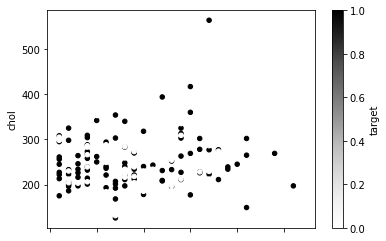

In [193]:
# Pyploy method
over_50.plot(kind='scatter', 
            x='age', 
            y='chol',
            c='target')

In [194]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age', ylabel='chol'>

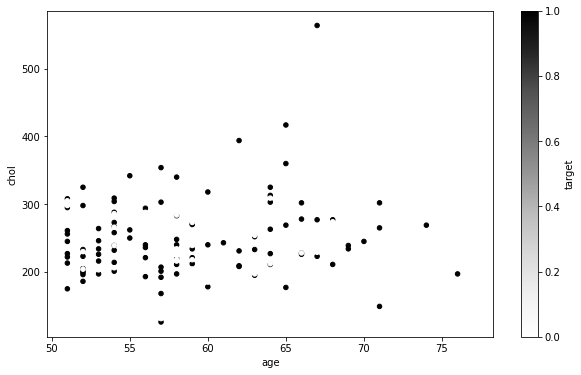

In [195]:
# OO method

fig, ax = plt.subplots(figsize=(10,6))
over_50.plot(kind="scatter",
            x='age',
            y='chol',
            c='target',
            ax=ax)

# ax.set_xlim(45,100)

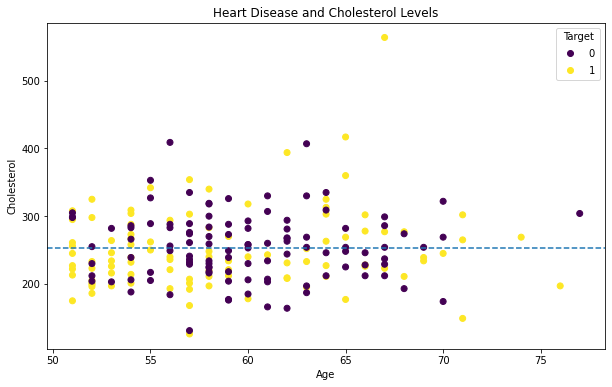

In [196]:
# Object orientd method from scratch

fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"])

ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age", 
      ylabel="Cholesterol")

#Adding a legend
ax.legend(*scatter.legend_elements(),title="Target") 
# legend_elements gets the parameters from the c commmand
# same as over_50.target.valeus()

#Adding a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle='--')

In [197]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


Text(0.5, 0.98, 'Heart Disease Analysis')

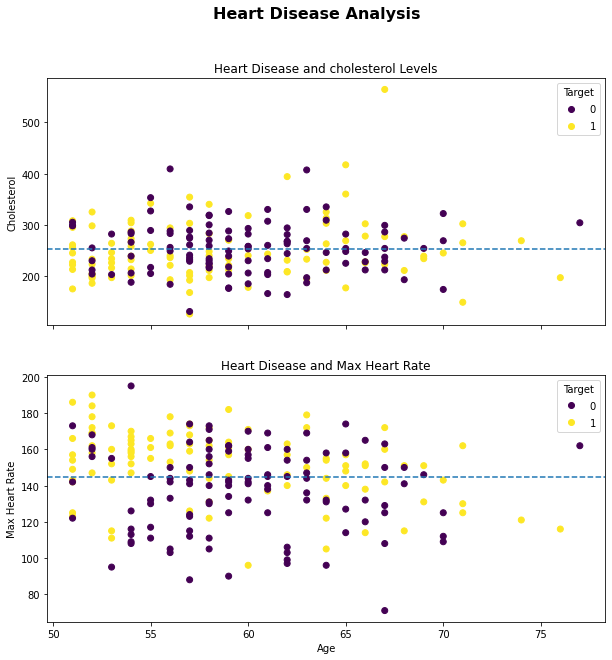

In [198]:
#set the style
# plt.style.use('seaborn-whitegrid')

# Creat a subplot from different columns
# fig, ax = plt.subplots(2,1, sharex=True)
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True)

#Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"])

#Customize ax0
ax0.set(title="Heart Disease and cholesterol Levels", 
#        xlabel = "Age",
       ylabel="Cholesterol")

#Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title='Target')

#Add a mean line
ax0.axhline(y=over_50["chol"].mean(),
           linestyle='--')



#Add data to ax1
ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"])

#Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate", 
       xlabel = "Age",
       ylabel="Max Heart Rate")

#Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title='Target')

#Add a mean line
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle='--');


# add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight='bold')

## Customizing the Matplotlib plots and getting stylish

In [199]:
# see the different styles availables
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [200]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel par 100KM,Number of Wheels,Passed road safety,Fabrication date
0,toyota,White,93776.875,4,4000.0,5.0,7.5,4,True,1950
1,honda,Red,54936.875,4,5000.0,5.0,9.2,4,True,1957
2,toyota,Blue,20343.125,3,7000.0,5.0,5.0,4,True,1965
3,bmw,Black,6986.875,5,22000.0,5.0,9.6,4,True,1973
4,nissan,White,133184.375,4,3500.0,5.0,8.7,4,True,1981


<AxesSubplot:>

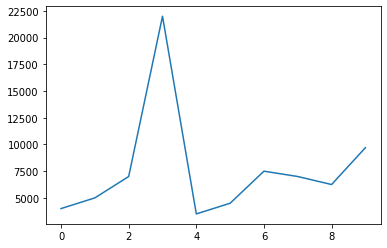

In [201]:
car_sales["Price"].plot()

<AxesSubplot:>

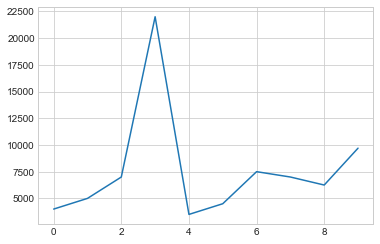

In [202]:
plt.style.use("seaborn-whitegrid")
car_sales["Price"].plot()

<AxesSubplot:>

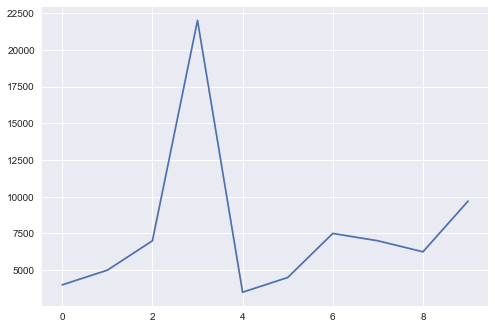

In [203]:
plt.style.use('seaborn')
car_sales.Price.plot()

<AxesSubplot:xlabel='Odometer (KM)', ylabel='Price'>

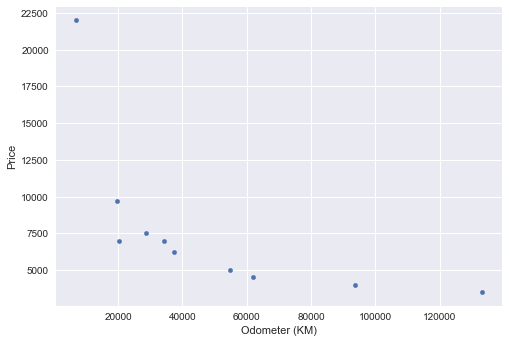

In [204]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

<AxesSubplot:>

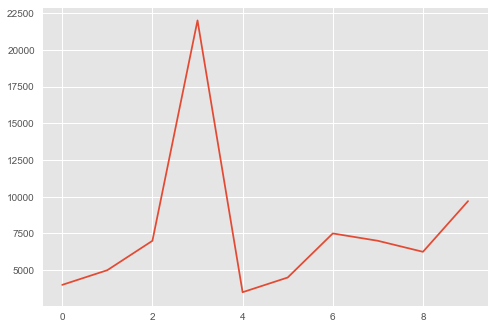

In [205]:
plt.style.use("ggplot")
car_sales.Price.plot()

In [206]:
# Creat some data
x = np.random.randn(10,4)
x

array([[ 2.54520078,  1.08081191,  0.48431215,  0.57914048],
       [-0.18158257,  1.41020463, -0.37447169,  0.27519832],
       [-0.96075461,  0.37692697,  0.03343893,  0.68056724],
       [-1.56349669, -0.56669762, -0.24214951,  1.51439128],
       [-0.3330574 ,  0.04736482,  1.46274045,  1.53502913],
       [ 0.56644004,  0.14926509, -1.078278  ,  1.39547227],
       [ 1.78748405, -0.56951726,  0.17538653, -0.46250554],
       [-1.0858006 ,  0.63973599, -0.38586334, -0.77576235],
       [ 0.99571135, -1.93320478,  0.24853063, -0.03124534],
       [-0.13947396, -0.19065598,  0.44863753, -0.99242977]])

In [207]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,2.545201,1.080812,0.484312,0.579140
1,-0.181583,1.410205,-0.374472,0.275198
2,-0.960755,0.376927,0.033439,0.680567
3,-1.563497,-0.566698,-0.242150,1.514391
4,-0.333057,0.047365,1.462740,1.535029
5,0.566440,0.149265,-1.078278,1.395472
6,1.787484,-0.569517,0.175387,-0.462506
7,-1.085801,0.639736,-0.385863,-0.775762
8,0.995711,-1.933205,0.248531,-0.031245
9,-0.139474,-0.190656,0.448638,-0.992430


matplotlib.axes._subplots.AxesSubplot

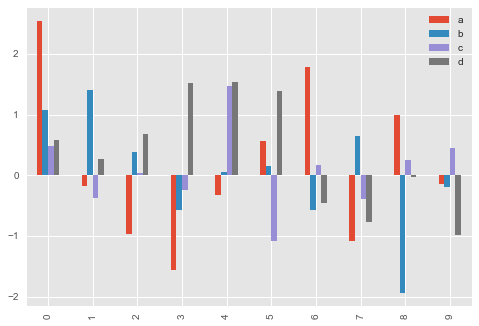

In [208]:
ax = df.plot(kind='bar')
type(ax)

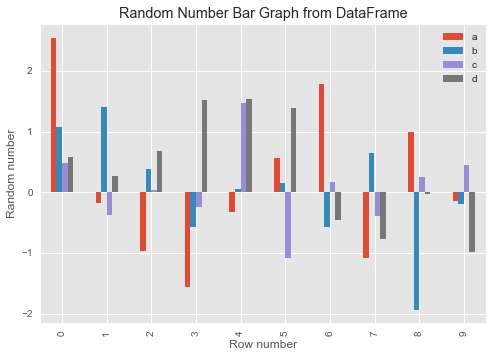

In [209]:
# Customize our plot with the set() method
ax = df.plot(kind='bar')
#Ass some labels and a title
ax.set(title='Random Number Bar Graph from DataFrame',
      xlabel='Row number',
      ylabel='Random number')
#Make the legend visible is not
ax.legend().set_visible(True)


In [210]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

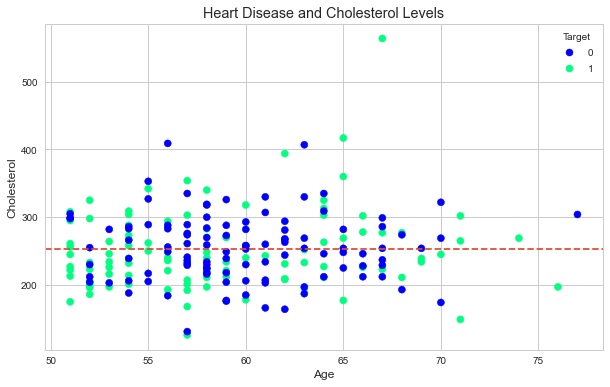

In [211]:
# set the style you want
plt.style.use('seaborn-whitegrid')

# Object orientd method from scratch

fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["chol"],
                    c=over_50["target"],
                    cmap="winter") # this changes the colour scheme

ax.set(title="Heart Disease and Cholesterol Levels",
      xlabel="Age", 
      ylabel="Cholesterol")

#Adding a legend
ax.legend(*scatter.legend_elements(),title="Target") 
# legend_elements gets the parameters from the c commmand
# same as over_50.target.valeus()

#Adding a horizontal line
ax.axhline(over_50["chol"].mean(),
          linestyle='--')

This plot shows some information on the heart disease data

Text(0.5, 0.98, 'Heart Disease Analysis')

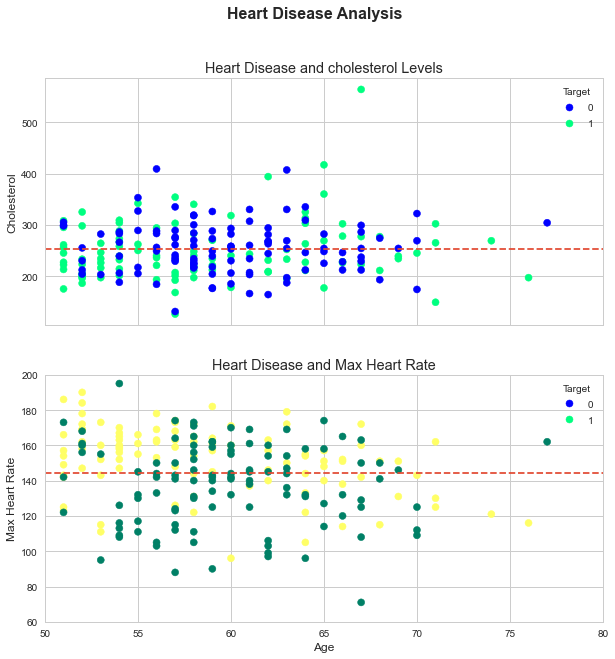

In [215]:
# Customizing the y and x axis limitations


# fig, ax = plt.subplots(2,1, sharex=True)
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex=True)

#Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")

#Customize ax0
ax0.set(title="Heart Disease and cholesterol Levels", 
#        xlabel = "Age",
       ylabel="Cholesterol")
ax0.set_xlim(50,80)
#Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title='Target')

#Add a mean line
ax0.axhline(y=over_50["chol"].mean(),
           linestyle='--')



#Add data to ax1
ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"], 
                     cmap="summer")

#Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate", 
       xlabel = "Age",
       ylabel="Max Heart Rate")
ax1.set_ylim(60,200)
#Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title='Target')

#Add a mean line
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle='--');


# add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight='bold')

In [218]:
fig.savefig("heart-disease-analysis-save-with-code.png")